<h1>Import the required libraries</h1>

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import time

<h1>Data Engineering-Datasets</h1>

In [46]:
dataset = pd.read_csv('C:/Users/wangd/Desktop/cancer_data.csv')
diagnosis_type = {'diagnosis': {'M':1, 'B':0}}
dataset.replace(diagnosis_type,inplace=True)
del dataset['id']

<h5> Without Sampling </h5>

In [47]:
#extract independent data
x= dataset.iloc[:,1:-1]
#extract dependent data
y= dataset.iloc[:,0]

#split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

<h5> Under Sampling </h5>

In [48]:
nm=NearMiss()
x_us,y_us=nm.fit_sample(x,y)
#split data into training and testing
x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x_us, y_us, random_state = 1)


<h5>Over Sampling</h5>

In [49]:
sm=SMOTE(random_state=1)
x_n=pd.DataFrame(x).to_numpy()
y_n=pd.DataFrame(y).to_numpy()
x_os,y_os=sm.fit_sample(x_n,y_n)

#split data into training and testing
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x_os, y_os, random_state = 1)


<h1>Feature Engineering - Pearson Correlation Datasets</h1>

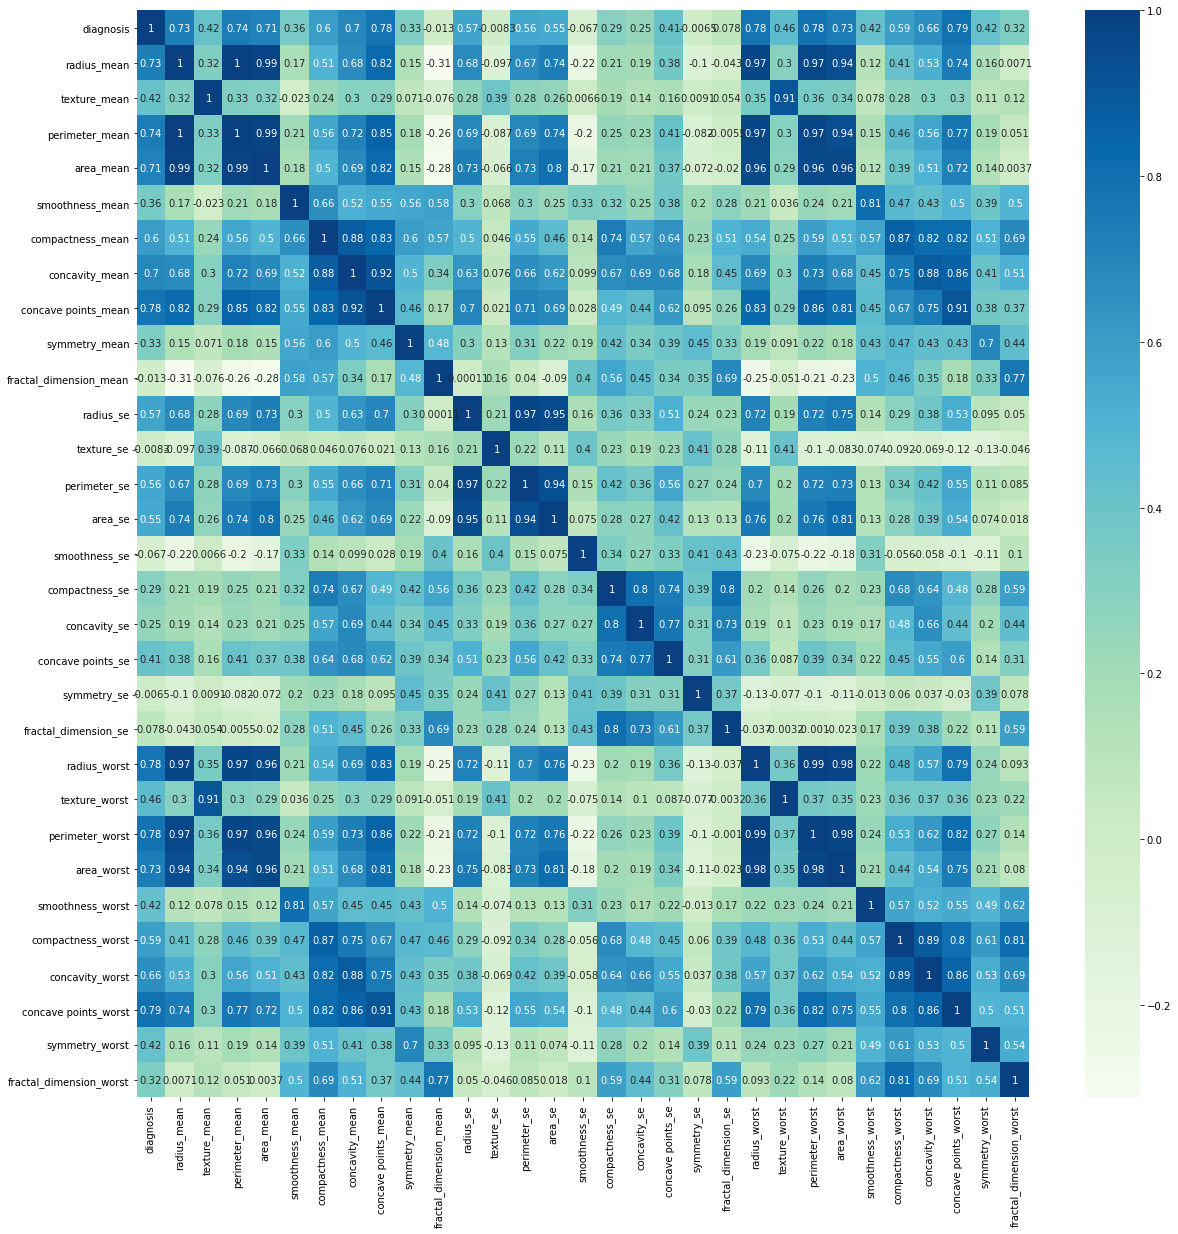

In [50]:
corr_mat = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data=corr_mat, annot=True, cmap='GnBu')
plt.show()

In [51]:
target = 'diagnosis'
# determine features that are either positively or negatively
# correlated to 'diagnosis' (our target label)
target_column = corr_mat[target]
target_column.drop([target], inplace=True)

# the variable 'candidates' contain rows that satisfies the condition (> 0.7 or < -0.7)
candidates = target_column[(target_column > 0.7) | (target_column < -0.7)]

# Drop the features that are not candidates
to_drop = list(set(corr_mat.index) - set(candidates.index))
workset = corr_mat.drop(index=to_drop, columns=to_drop)

skip = []
accept = []
for colname in workset.columns:
    if not colname in skip and not colname in accept:
        series = workset[colname]

        # look for other features that are
        # highly-correlated with the feature "colname"
        series = series[(series > 0.8)|(series<-0.8)]

        # fetch the Pandas series from the 'candidates'
        # dataframe that only contains items found
        # in our 'series' variable (above)
        alike = candidates[series.index]

        # idxmax() to get the feature that is most
        # correlated with "diagnosis" (our target).
        # abs() to absolute the values because
        # the features could be either positively
        # or negatively correlated to "diagnosis" (our target)
        top = alike.abs().idxmax()

        # accept the "top" feature
        accept += [top]

        # discard other highly-correlated features
        # with respect to the "top" feature
        skip += set(alike.index) - set([top])

print('skip = ', skip)
print('selected =', accept)

skip =  ['perimeter_mean', 'radius_worst', 'area_worst', 'area_mean', 'concave points_mean', 'radius_mean', 'concave points_mean', 'perimeter_worst']
selected = ['perimeter_worst', 'concave points_worst']


<h5>Feature Selection Dataset without Sampling</h5>

In [52]:
#extract independent data
x_pear= dataset[accept]
#extract dependent data
y_pear=dataset['diagnosis']
#split data into training and testing
x_train_pear, x_test_pear, y_train_pear, y_test_pear = train_test_split(x_pear, y_pear, random_state = 1)


<h5>Feature Selection Dataset with Under Sampling</h5>

In [53]:
nm=NearMiss()
x_us_pear,y_us_pear=nm.fit_sample(x_pear,y_pear)
#split data into training and testing
x_train_us_pear, x_test_us_pear, y_train_us_pear, y_test_us_pear = train_test_split(x_us_pear, y_us_pear, random_state = 1)
x_train_us_pear

,perimeter_worst,concave points_worst
106,96.53,0.08216
92,93.22,0.09783
66,92.74,0.06335
189,86.04,0.06835
23,105.90,0.08308
...,...,...
255,135.10,0.13250
72,101.10,0.09090
396,168.20,0.22800
235,122.40,0.27010


<h5>Feature Selection Dataset with Over Sampling</h5>

In [54]:
sm=SMOTE(random_state=1)
x_n_pear=pd.DataFrame(x_pear).to_numpy()
y_n_pear=pd.DataFrame(y_pear).to_numpy()
x_os_pear,y_os_pear=sm.fit_sample(x_n_pear,y_n_pear)

#split data into training and testing
x_train_os_pear, x_test_os_pear, y_train_os_pear, y_test_os_pear = train_test_split(x_os_pear, y_os_pear, random_state = 1)
x_train_os_pear

array([[1.49462036e+02, 1.99159282e-01],
       [8.68200000e+01, 1.63500000e-02],
       [6.33400000e+01, 3.84600000e-02],
       ...,
       [1.51600000e+02, 1.89900000e-01],
       [9.82700000e+01, 7.96300000e-02],
       [8.44600000e+01, 5.01300000e-02]])

<h1>PCA-Datasets</h1>

<h2>PCA Function</h2>

In [55]:
def principleComp(data):
    data_pca = StandardScaler().fit_transform(data)
    
    # apply PCA on our features
    pca = PCA(n_components=5)
    pc = pca.fit_transform(data_pca)
    return pc

<h5>PCA dataset without Sampling</h5>

In [56]:
#extract independent data
x_pc= principleComp(x)
#extract dependent data
y_pc=dataset['diagnosis']
#split data into training and testing
x_train_pc, x_test_pc, y_train_pc, y_test_pc = train_test_split(x_pc, y_pc, random_state = 1)
x_train_pc

array([[ 5.44976082,  2.8031784 , -2.94933065, -4.00570303,  2.01999625],
       [-0.41346281, -0.94462937, -0.9766205 , -0.12072922,  0.29420323],
       [ 0.27707552, -1.63498999, -0.62033886, -0.67319355, -0.48435978],
       ...,
       [ 5.15419594,  0.34035349, -1.71735623, -1.46060402,  0.89566491],
       [-2.26461317, -1.41677071,  0.49021062, -1.13533002,  0.01885479],
       [-3.57439748, -1.22221776,  1.80286417, -0.46094853,  0.043799  ]])

<h5>PCA dataset with Under Sampling</h5>

In [57]:
#extract independent data
x_us_pc= principleComp(x_us)
#extract dependent data
y_us_pc=y_us
#split data into training and testing
x_train_us_pc, x_test_us_pc, y_train_us_pc, y_test_us_pc = train_test_split(x_us_pc, y_us_pc, random_state = 1)
x_train_us_pc

array([[-5.08008564, -2.10949942,  0.37520733,  1.5951218 ,  0.22447893],
       [-1.63516548, -0.49339607, -0.54412051,  1.13892654,  0.6934861 ],
       [-3.95978065,  0.32194118, -0.24405429, -1.7823949 , -0.85415498],
       ...,
       [ 3.29903121, -3.73373901, -0.71046006, -0.81726584,  0.43284974],
       [ 2.17851383,  2.62582124, -3.07373423, -1.36922674,  0.40632875],
       [ 0.84108227,  1.73669091,  0.82025113,  2.15814664, -0.33556582]])

<h5>PCA dataset with Over Sampling</h5>

In [58]:
#extract independent data
x_os_pc=principleComp(x_os)
#extract dependent data
y_os_pc=y_os
#split data into training and testing
x_train_os_pc, x_test_os_pc, y_train_os_pc, y_test_os_pc = train_test_split(x_os_pc, y_os_pc, random_state = 1)
x_train_os_pc

array([[ 3.01691001, -0.04769816, -2.31300548, -0.76201635,  0.78876257],
       [-5.07007706, -2.66289255,  1.12969816, -0.31499143,  0.05809169],
       [-2.70563631,  3.93606343,  3.81045731, -1.6439347 ,  2.05890931],
       ...,
       [ 4.48567794,  0.47451666, -1.68119109,  1.23216474,  1.0029301 ],
       [-2.95686956, -1.37513853,  0.43488349,  1.2305411 , -0.03434572],
       [-4.26607226, -1.2160333 ,  1.8198826 ,  0.68999174, -0.05522981]])

<h1>Models-Training and Testing</h1>

<h2>Training and Testing Functions</h2>

In [59]:
def trainModel(classifier,train_x,train_y,test_x,test_y):
    #Model training
    start = time.time()
    print("Training Start Time =", start)
    classifier.fit(train_x, train_y)
    end = start-time.time()
    print("Training End =", end)


    #Model Testing
    start = time.time()
    print("Testing Start Time =", start)
    y_pred = classifier.predict(test_x)
    end = start - time.time()
    print("Testing end =", end)
    print("Confusion Matrix:",confusion_matrix (test_y, y_pred, labels = [1,0]))

    #Accuracy-all features no sampling
    acc_score=accuracy_score(test_y, y_pred)
    print("Accuracy score=",acc_score)


<h5>Check for k-value providing highest accuracy score</h5>

In [60]:
def kValue(train_x,train_y,test_x,test_y):
    kVal = 0
    maxAc = 0
    for i in range(1, 30, 2):
        kClass = KNeighborsClassifier(n_neighbors=i)
        kClass.fit(x_train, y_train)
        ac = accuracy_score(y_test, kClass.predict(x_test))
        if ac > maxAc:
            maxAc = ac
            kVal = i
        else:
            pass
        return kVal

<h5>Model Initialization</h5>

In [61]:
dt = DecisionTreeClassifier()
logreg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 1, max_iter=5000)

<h2>Models Without Feature Selection</h2>

<h3>Decision Tree</h3>

<h5>Without Data Sampling</h5>

In [62]:
trainModel(dt,x_train,y_train,x_test,y_test)

Training Start Time = 1605221524.3241556
Training End = -0.007993221282958984
Testing Start Time = 1605221524.3321488
Testing end = -0.0020074844360351562
Confusion Matrix: [[51  4]
 [ 1 87]]
Accuracy score= 0.965034965034965


<h5>Under Sampling</h5>

In [19]:
trainModel(dt,x_train_us,y_train_us,x_test_us,y_test_us)

Training Start Time = 1605221483.325977
Training End = -0.006979942321777344
Testing Start Time = 1605221483.333955
Testing end = -0.001994609832763672
Confusion Matrix: [[53  4]
 [ 6 43]]
Accuracy score= 0.9056603773584906


<h5>Over Sampling</h5>

In [20]:
trainModel(dt,x_train_os,y_train_os,x_test_os,y_test_os)

Training Start Time = 1605221483.3568943
Training End = -0.009971380233764648
Testing Start Time = 1605221483.3678632
Testing end = -0.0009982585906982422
Confusion Matrix: [[92  7]
 [ 4 76]]
Accuracy score= 0.9385474860335196


<h3>Logistic Regression</h3>

<h5>Without Data Sampling</h5>

In [21]:
trainModel(logreg,x_train,y_train,x_test,y_test)

Training Start Time = 1605221483.3878112
Training End = -0.6672163009643555
Testing Start Time = 1605221484.0550275
Testing end = -0.001994609832763672
Confusion Matrix: [[50  5]
 [ 3 85]]
Accuracy score= 0.9440559440559441


<h5>Under Sampling</h5>

In [22]:
trainModel(logreg,x_train_us,y_train_us,x_test_us,y_test_us)

Training Start Time = 1605221484.0695746
Training End = -0.14261865615844727
Testing Start Time = 1605221484.2131925
Testing end = -0.001995563507080078
Confusion Matrix: [[53  4]
 [ 2 47]]
Accuracy score= 0.9433962264150944


<h5>Over Sampling</h5>

In [23]:
trainModel(logreg,x_train_os,y_train_os,x_test_os,y_test_os)

Training Start Time = 1605221484.230091
Training End = -0.7881066799163818
Testing Start Time = 1605221485.0181978
Testing end = 0.0
Confusion Matrix: [[92  7]
 [ 2 78]]
Accuracy score= 0.9497206703910615


<h3>K-Nearest Neighbour</h3>

<h5>Without Data Sampling</h5>

In [24]:
knn = KNeighborsClassifier(n_neighbors=kValue(x_train,y_train,x_test,y_test))
trainModel(knn,x_train,y_train,x_test,y_test)

Training Start Time = 1605221485.0460887
Training End = -0.0036149024963378906
Testing Start Time = 1605221485.0497036
Testing end = -0.00498652458190918
Confusion Matrix: [[48  7]
 [ 4 84]]
Accuracy score= 0.9230769230769231


<h5>Under Sampling</h5>

In [25]:
knn = KNeighborsClassifier(n_neighbors=kValue(x_train_us,y_train_us,x_test_us,y_test_us))
trainModel(knn,x_train_us,y_train_us,x_test_us,y_test_us)

Training Start Time = 1605221485.0736394
Training End = -0.003991842269897461
Testing Start Time = 1605221485.0776312
Testing end = -0.005014181137084961
Confusion Matrix: [[50  7]
 [ 2 47]]
Accuracy score= 0.9150943396226415


<h5>Over Sampling</h5>

In [26]:
knn = KNeighborsClassifier(n_neighbors=kValue(x_train_os,y_train_os,x_test_os,y_test_os))
trainModel(knn,x_train_os,y_train_os,x_test_os,y_test_os)

Training Start Time = 1605221485.1091425
Training End = -0.0029914379119873047
Testing Start Time = 1605221485.112134
Testing end = -0.004984855651855469
Confusion Matrix: [[97  2]
 [ 3 77]]
Accuracy score= 0.9720670391061452


<h2>Models With Feature Selection-Pearson Correlation</h2>

<h3>Decision tree</h3>

<h5>Without Data Sampling</h5>

In [27]:
trainModel(dt,x_train_pear,y_train_pear,x_test_pear,y_test_pear)

Training Start Time = 1605221485.1272254
Training End = -0.0029921531677246094
Testing Start Time = 1605221485.1302176
Testing end = -0.001995086669921875
Confusion Matrix: [[47  8]
 [ 6 82]]
Accuracy score= 0.9020979020979021


<h5>Under Sampling</h5>

In [28]:
trainModel(dt,x_train_us_pear,y_train_us_pear,x_test_us_pear,y_test_us_pear)

Training Start Time = 1605221485.1431842
Training End = -0.003988742828369141
Testing Start Time = 1605221485.147173
Testing end = -0.0019927024841308594
Confusion Matrix: [[50  7]
 [ 3 46]]
Accuracy score= 0.9056603773584906


<h5>Over Sampling</h5>

In [29]:
trainModel(dt,x_train_os_pear,y_train_os_pear,x_test_os_pear,y_test_os_pear)

Training Start Time = 1605221485.1581612
Training End = -0.0029916763305664062
Testing Start Time = 1605221485.1611528
Testing end = 0.0
Confusion Matrix: [[94  5]
 [10 70]]
Accuracy score= 0.9162011173184358


<h3>Logistic Regression</h3>

<h5>Without Data Sampling</h5>

In [30]:
trainModel(logreg,x_train_pear,y_train_pear,x_test_pear,y_test_pear)

Training Start Time = 1605221485.1744506
Training End = -0.014983654022216797
Testing Start Time = 1605221485.1904306
Testing end = -0.0009744167327880859
Confusion Matrix: [[45 10]
 [ 6 82]]
Accuracy score= 0.8881118881118881


<h5>Under Sampling</h5>

In [31]:
trainModel(logreg,x_train_us_pear,y_train_us_pear,x_test_us_pear,y_test_us_pear)

Training Start Time = 1605221485.207111
Training End = -0.014982938766479492
Testing Start Time = 1605221485.2220938
Testing end = -0.0019941329956054688
Confusion Matrix: [[50  7]
 [ 3 46]]
Accuracy score= 0.9056603773584906


<h5>Over Sampling</h5>

In [32]:
trainModel(logreg,x_train_os_pear,y_train_os_pear,x_test_os_pear,y_test_os_pear)

Training Start Time = 1605221485.2374175
Training End = -0.015956640243530273
Testing Start Time = 1605221485.253374
Testing end = 0.0
Confusion Matrix: [[91  8]
 [ 6 74]]
Accuracy score= 0.9217877094972067


<h3>K-Nearest Neighbour</h3>

<h5>Without Data Sampling</h5>

In [33]:
knn = KNeighborsClassifier(n_neighbors=kValue(x_train,y_train,x_test,y_test))
trainModel(knn,x_train_pear,y_train_pear,x_test_pear,y_test_pear)

Training Start Time = 1605221485.2790763
Training End = -0.002991914749145508
Testing Start Time = 1605221485.2820683
Testing end = -0.005983829498291016
Confusion Matrix: [[43 12]
 [ 7 81]]
Accuracy score= 0.8671328671328671


<h5>Under Sampling</h5>

In [34]:
knn = KNeighborsClassifier(n_neighbors=kValue(x_train_us,y_train_us,x_test_us,y_test_us))
trainModel(knn,x_train_us_pear,y_train_us_pear,x_test_us_pear,y_test_us_pear)

Training Start Time = 1605221485.3099954
Training End = -0.0019936561584472656
Testing Start Time = 1605221485.312986
Testing end = -0.003988742828369141
Confusion Matrix: [[47 10]
 [ 4 45]]
Accuracy score= 0.8679245283018868


<h5>Over Sampling</h5>

In [35]:
knn = KNeighborsClassifier(n_neighbors=kValue(x_train_os,y_train_os,x_test_os,y_test_os))
trainModel(knn,x_train_os_pear,y_train_os_pear,x_test_os_pear,y_test_os_pear)

Training Start Time = 1605221485.3419652
Training End = -0.0009992122650146484
Testing Start Time = 1605221485.3439605
Testing end = -0.0049855709075927734
Confusion Matrix: [[88 11]
 [ 9 71]]
Accuracy score= 0.888268156424581


<h2>Models With Feature Extraction-PCA</h2>

<h3>Decision Tree</h3>

<h5>Without Data Sampling</h5>

In [36]:
trainModel(dt,x_train_pc,y_train_pc,x_test_pc,y_test_pc)

Training Start Time = 1605221485.3629982
Training End = -0.001983165740966797
Testing Start Time = 1605221485.3649814
Testing end = -0.0009975433349609375
Confusion Matrix: [[51  4]
 [ 5 83]]
Accuracy score= 0.9370629370629371


<h5>Under Sampling</h5>

In [37]:
trainModel(dt,x_train_us_pc,y_train_us_pc,x_test_us_pc,y_test_us_pc)

Training Start Time = 1605221485.3771045
Training End = -0.0019965171813964844
Testing Start Time = 1605221485.380097
Testing end = -0.000997304916381836
Confusion Matrix: [[48  9]
 [ 3 46]]
Accuracy score= 0.8867924528301887


<h5>Over Sampling</h5>

In [38]:
trainModel(dt,x_train_os_pc,y_train_os_pc,x_test_os_pc,y_test_os_pc)

Training Start Time = 1605221485.3920918
Training End = -0.00299835205078125
Testing Start Time = 1605221485.39509
Testing end = -0.0009913444519042969
Confusion Matrix: [[93  6]
 [ 2 78]]
Accuracy score= 0.9553072625698324


<h3>Logistic Regression</h3>

<h5>Without Data Sampling</h5>

In [39]:
trainModel(logreg,x_train_pc,y_train_pc,x_test_pc,y_test_pc)

Training Start Time = 1605221485.4063623
Training End = -0.010957717895507812
Testing Start Time = 1605221485.4183178
Testing end = 0.0
Confusion Matrix: [[52  3]
 [ 2 86]]
Accuracy score= 0.965034965034965


<h5>Under Sampling</h5>

In [40]:
trainModel(logreg,x_train_us_pc,y_train_us_pc,x_test_us_pc,y_test_us_pc)

Training Start Time = 1605221485.4381008
Training End = -0.009947538375854492
Testing Start Time = 1605221485.4480484
Testing end = 0.0
Confusion Matrix: [[57  0]
 [ 2 47]]
Accuracy score= 0.9811320754716981


<h5>Over Sampling</h5>

In [41]:
trainModel(logreg,x_train_os_pc,y_train_os_pc,x_test_os_pc,y_test_os_pc)

Training Start Time = 1605221485.4692805
Training End = -0.01098012924194336
Testing Start Time = 1605221485.4802606
Testing end = -0.0009884834289550781
Confusion Matrix: [[98  1]
 [ 1 79]]
Accuracy score= 0.9888268156424581


<h3>K-Nearest Neighbour</h5>

<h5>Without Data Sampling</h5>

In [42]:
knn = KNeighborsClassifier(n_neighbors=kValue(x_train,y_train,x_test,y_test))
trainModel(knn,x_train_pc,y_train_pc,x_test_pc,y_test_pc)

Training Start Time = 1605221485.5130072
Training End = 0.0
Testing Start Time = 1605221485.5139806
Testing end = -0.005010128021240234
Confusion Matrix: [[48  7]
 [ 3 85]]
Accuracy score= 0.9300699300699301


<h5>Under Sampling</h5>

In [43]:
knn = KNeighborsClassifier(n_neighbors=kValue(x_train_us,y_train_us,x_test_us,y_test_us))
trainModel(knn,x_train_us_pc,y_train_us_pc,x_test_us_pc,y_test_us_pc)

Training Start Time = 1605221485.5419362
Training End = -0.0019674301147460938
Testing Start Time = 1605221485.5439036
Testing end = -0.003992319107055664
Confusion Matrix: [[55  2]
 [ 1 48]]
Accuracy score= 0.9716981132075472


<h5>Over Sampling</h5>

In [44]:
knn = KNeighborsClassifier(n_neighbors=kValue(x_train_os,y_train_os,x_test_os,y_test_os))
trainModel(knn,x_train_os_pc,y_train_os_pc,x_test_os_pc,y_test_os_pc)

Training Start Time = 1605221485.573878
Training End = -0.000997304916381836
Testing Start Time = 1605221485.5758734
Testing end = -0.00897526741027832
Confusion Matrix: [[98  1]
 [ 6 74]]
Accuracy score= 0.9608938547486033
